In [2]:
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('data/all_features_v2_dataset_no_header.xlsx')

X = data.iloc[:,0:13]  # features
Y = data.iloc[:,-1]    # label column

In [3]:
# 10% test, 90% train
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.1,random_state=109)

# Transforming non numerical labels into numerical labels
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train)
y_train = encoder.transform(Y_train)

# encoding test labels 
encoder.fit(Y_test)
y_test = encoder.transform(Y_test)

# Scaling the Train and Test feature set 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

skf = StratifiedKFold(n_splits=10)

In [4]:
t = time()

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

print('Time train: {} mins'.format(round((time() - t) / 60, 2)))

Time train: 5.7 mins


In [6]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision micro:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision macro:",metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall micro:",metrics.recall_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall macro:",metrics.recall_score(y_test, y_pred, average='macro'))

print("F1 Score micro:",metrics.f1_score(y_test, y_pred, average='micro'))
print("F1 Score macro:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.7474271012006861
Precision micro: 0.7474271012006861
Precision macro: 0.7429218059517115
Recall micro: 0.7474271012006861
Recall macro: 0.5626623060282623
F1 Score micro: 0.747427101200686
F1 Score macro: 0.6182946254506475


In [8]:
Y_pred_label = list(encoder.inverse_transform(y_pred))

# Making the Confusion Matrix
confusion_matrix_res = confusion_matrix(Y_test,Y_pred_label)
print(confusion_matrix_res)
print("\n")
print(classification_report(Y_test,Y_pred_label))

cross_val_score_result = cross_val_score(clf, X_test, y_test, cv=10)

print(cross_val_score_result)

[[  22    0    0    5    0    1    4    0    9]
 [   0  208    1    9    0    6   14    9   48]
 [   0    3   12   13    0    9    9    6   36]
 [   0    0    1 1742   18   48  447    0   39]
 [   1    0    0   64   99    4   17    3   34]
 [   1    1    0  147    6  299  116   36  134]
 [   1    0    0  273   10   23 3600    3   55]
 [   0    1    1   20    0   26   43  246   90]
 [   1   12    2  108    2   66  273   47  744]]


              precision    recall  f1-score   support

    Currency       0.85      0.54      0.66        41
    DateTime       0.92      0.71      0.80       295
       Event       0.71      0.14      0.23        88
    Location       0.73      0.76      0.75      2295
 Nationality       0.73      0.45      0.55       222
Organization       0.62      0.40      0.49       740
      Person       0.80      0.91      0.85      3965
  PersonType       0.70      0.58      0.63       427
       Thing       0.63      0.59      0.61      1255

    accuracy           

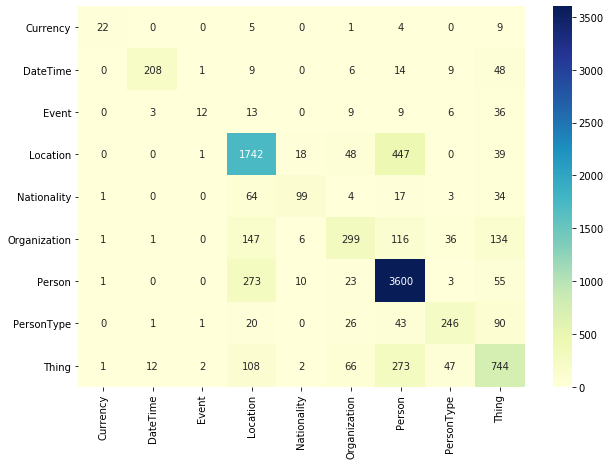

In [9]:
labels = ['Currency', 'DateTime', 'Event', 'Location', 'Nationality', 'Organization', 'Person', 'PersonType', 'Thing']

df_cm = pd.DataFrame(confusion_matrix_res, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


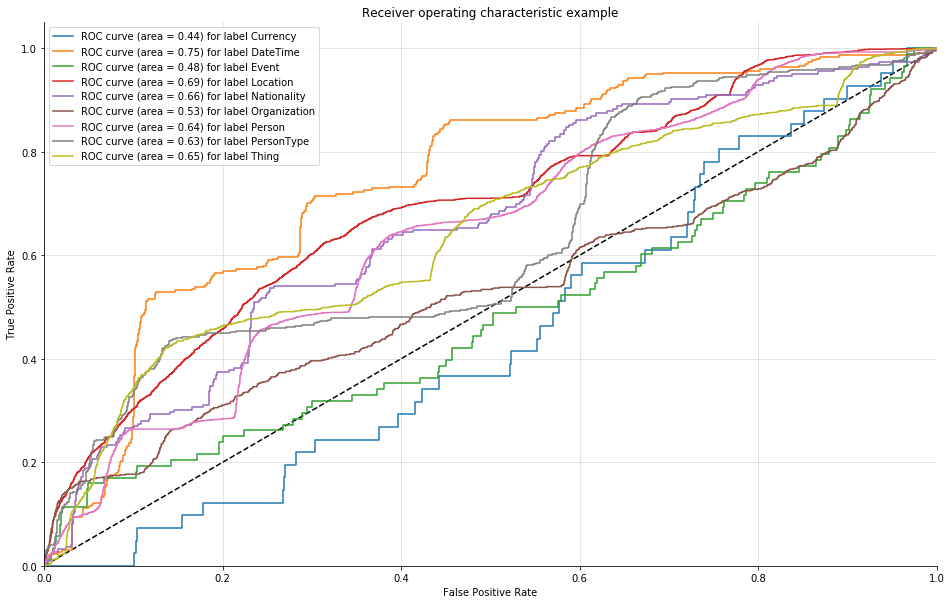

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], labels[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sn.despine()
    plt.show()

    
plot_multiclass_roc(clf, X_test, y_test, n_classes=9, figsize=(16, 10))